In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

In [3]:
data_dir = "/Users/smsharma/Desktop/"

# 1. Get (heuristic) threshold for direct production graph for a heavy mediator

In [18]:
masses = [100000]  # Pick large mediator mass

In [19]:
# Loop over graphs and grab cross sections
# Pick \lambda = 1, check also for \lambda = 0.3

cxns = []

for mass in masses:
    with open (data_dir + "MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda1//Events/html_lambda1_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
                    cxns.append(float(graph_cxn))


Text(0.5, 0, '$\\log_{10}(\\sigma [\\mathrm{arb.}])$')

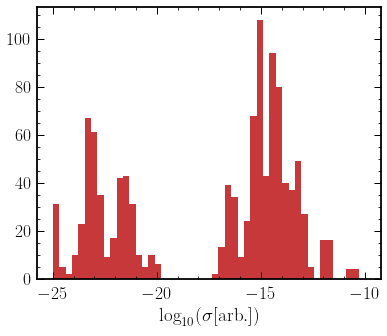

In [20]:
plt.hist(np.log10(cxns), np.linspace(-25, -10, 50));
plt.xlabel("$\log_{10}(\sigma [\mathrm{arb.}])$")

In [7]:
sigma_dp_thresh = 1e-17  # Eyeballing # Similar for \lambda = 0.3

# 2. Get xsec ratios 

## 2.1. $\lambda = 0.3$

### 2.1.1. Get DP graphs

In [8]:
masses = [100000]

In [9]:
dp_frac = []

dp_graphs = []
rest_graphs = []

for mass in masses:
    with open (data_dir + "/MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda0p3//Events/html_lambda0p3_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
    
        dp_sum = 0.
        rest_sum = 0.

        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
                    if float(graph_cxn) > sigma_dp_thresh: 
                        
                        dp_graphs.append(graph_name)
                    else:
                        rest_graphs.append(graph_name)

### 2.1.2. Get xsec ratio of DP/rest graphs

In [10]:
masses = [100] + list(np.arange(300,2000, 100))+  list(np.arange(2000,7000, 500))

In [11]:
dp_frac = []
dp_sum_ary = []

for mass in tqdm(masses):
    with open (data_dir + "MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda0p3//Events/html_lambda0p3_"+str(mass) + "_0.lhe", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    dp_sum = 0.
    rest_sum = 0.
    
    for table in soup.find_all('table')[1:]:
    


        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
                    if graph_name in dp_graphs:
                        dp_sum += float(graph_cxn)
                    else:
                        rest_sum += float(graph_cxn)

    dp_sum_ary.append(dp_sum)
    dp_frac.append(dp_sum/(dp_sum+rest_sum))

## 2.2. $\lambda = 1$

### 2.2.1. Get DP graphs

In [12]:
masses = [100000]

In [13]:
dp_graphs = []
rest_graphs = []

for mass in masses:
    with open (data_dir + "MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda1//Events/html_lambda1_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    
    for table in soup.find_all('table')[1:]:
    
        dp_sum = 0.
        rest_sum = 0.

        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
                    if float(graph_cxn) > sigma_dp_thresh: 
                        dp_graphs.append(graph_name)
                    else:
                        rest_graphs.append(graph_name)

### 2.2.2. Get xsec ratio of DP/rest graphs

In [14]:
masses = [100] + list(np.arange(300,2000, 100))+  list(np.arange(2000,7000, 500))

In [15]:
dp_frac_lambda1 = []
dp_sum_ary_lambda1 = []

for mass in tqdm(masses):
    with open (data_dir + "MG5_aMC_v2_5_6_patch_int_signal/bin/sig_tchannel_lambda1//Events/html_lambda1_"+str(mass) + "_0.html", "r") as myfile:
        data=myfile.read()
        
    soup = BeautifulSoup(data) # Parse the HTML as a string
    dp_sum_lambda1 = 0.
    rest_sum_lambda1 = 0.
    
    for table in soup.find_all('table')[1:]:
    


        for row in table.find_all('tr'):
            column_marker = 0
            columns = row.find_all('td')

            for icolumn, column in enumerate(columns):
                graph_cxn = None
                if icolumn == 0:
                    graph_name = (column.get_text())
                if icolumn == 1:
                    graph_cxn = (column.get_text())
                if graph_cxn is not None:
                    if graph_name in dp_graphs:
                        dp_sum_lambda1 += float(graph_cxn)
                    else:
                        rest_sum_lambda1 += float(graph_cxn)

    dp_sum_ary_lambda1.append(dp_sum_lambda1)
    dp_frac_lambda1.append(dp_sum_lambda1/(dp_sum_lambda1+rest_sum_lambda1))

# 3. Plot

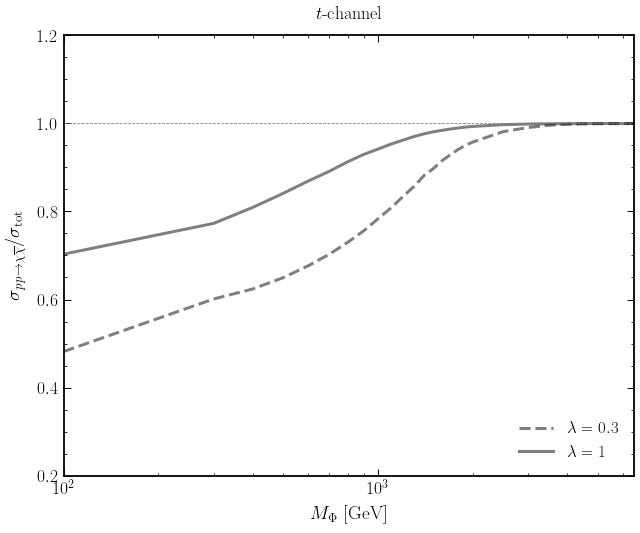

In [16]:
fig=plt.figure(figsize=(9,7.5))

lw = 2.5

plt.plot(masses, np.array(dp_frac)*1, color = 'k', label = "$\lambda = 0.3$",lw=3, alpha=0.5, ls='--')
plt.plot(masses, np.array(dp_frac_lambda1)*1, color = 'k', label = r"$\lambda = 1$",lw=3, alpha=0.5)


plt.xscale("log")
plt.xlabel(r"$M_\Phi$ [GeV]")
plt.ylabel(r"$\sigma_{pp\rightarrow \chi\overline\chi}/\sigma_\mathrm{tot}$")
plt.ylim(0.2,1.2)
plt.xlim(min(masses), max(masses))

leg = plt.legend(loc='lower right')

plt.tick_params(axis='both', which='major')

title = r"$t$-channel"
plt.title(title)
ax = plt.gca()
ttl = ax.title
ttl.set_position([.5, 1.02])
plt.tight_layout()

plt.tick_params(axis='both', which='major')

plt.axhline(1.,ls='--',lw=0.8, color='grey')